![logo](../Data/JFM-notebooks-logo.jpg)

In [3]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
plt.rcParams.update({'font.size': 18})
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r"\usepackage{amsmath}")
plt.rc('font', family='serif')

In [4]:
# Loading in datasets
ds_lp = xr.open_dataset('../Data/solver_lowpass_x_y_two_waves_omega_5.5_Nint_1_strat_3_T_40.nc')
ds_lp2 = xr.open_dataset('../Data/solver_lowpass_x_y_two_waves_omega_2_Nint_1_strat_3_T_40.nc')
ds_lbp = xr.open_dataset('../Data/solver_lowbandpass_x_y_two_waves_omega_2_5.5_9_Nint_1_strat_3_T_40.nc')

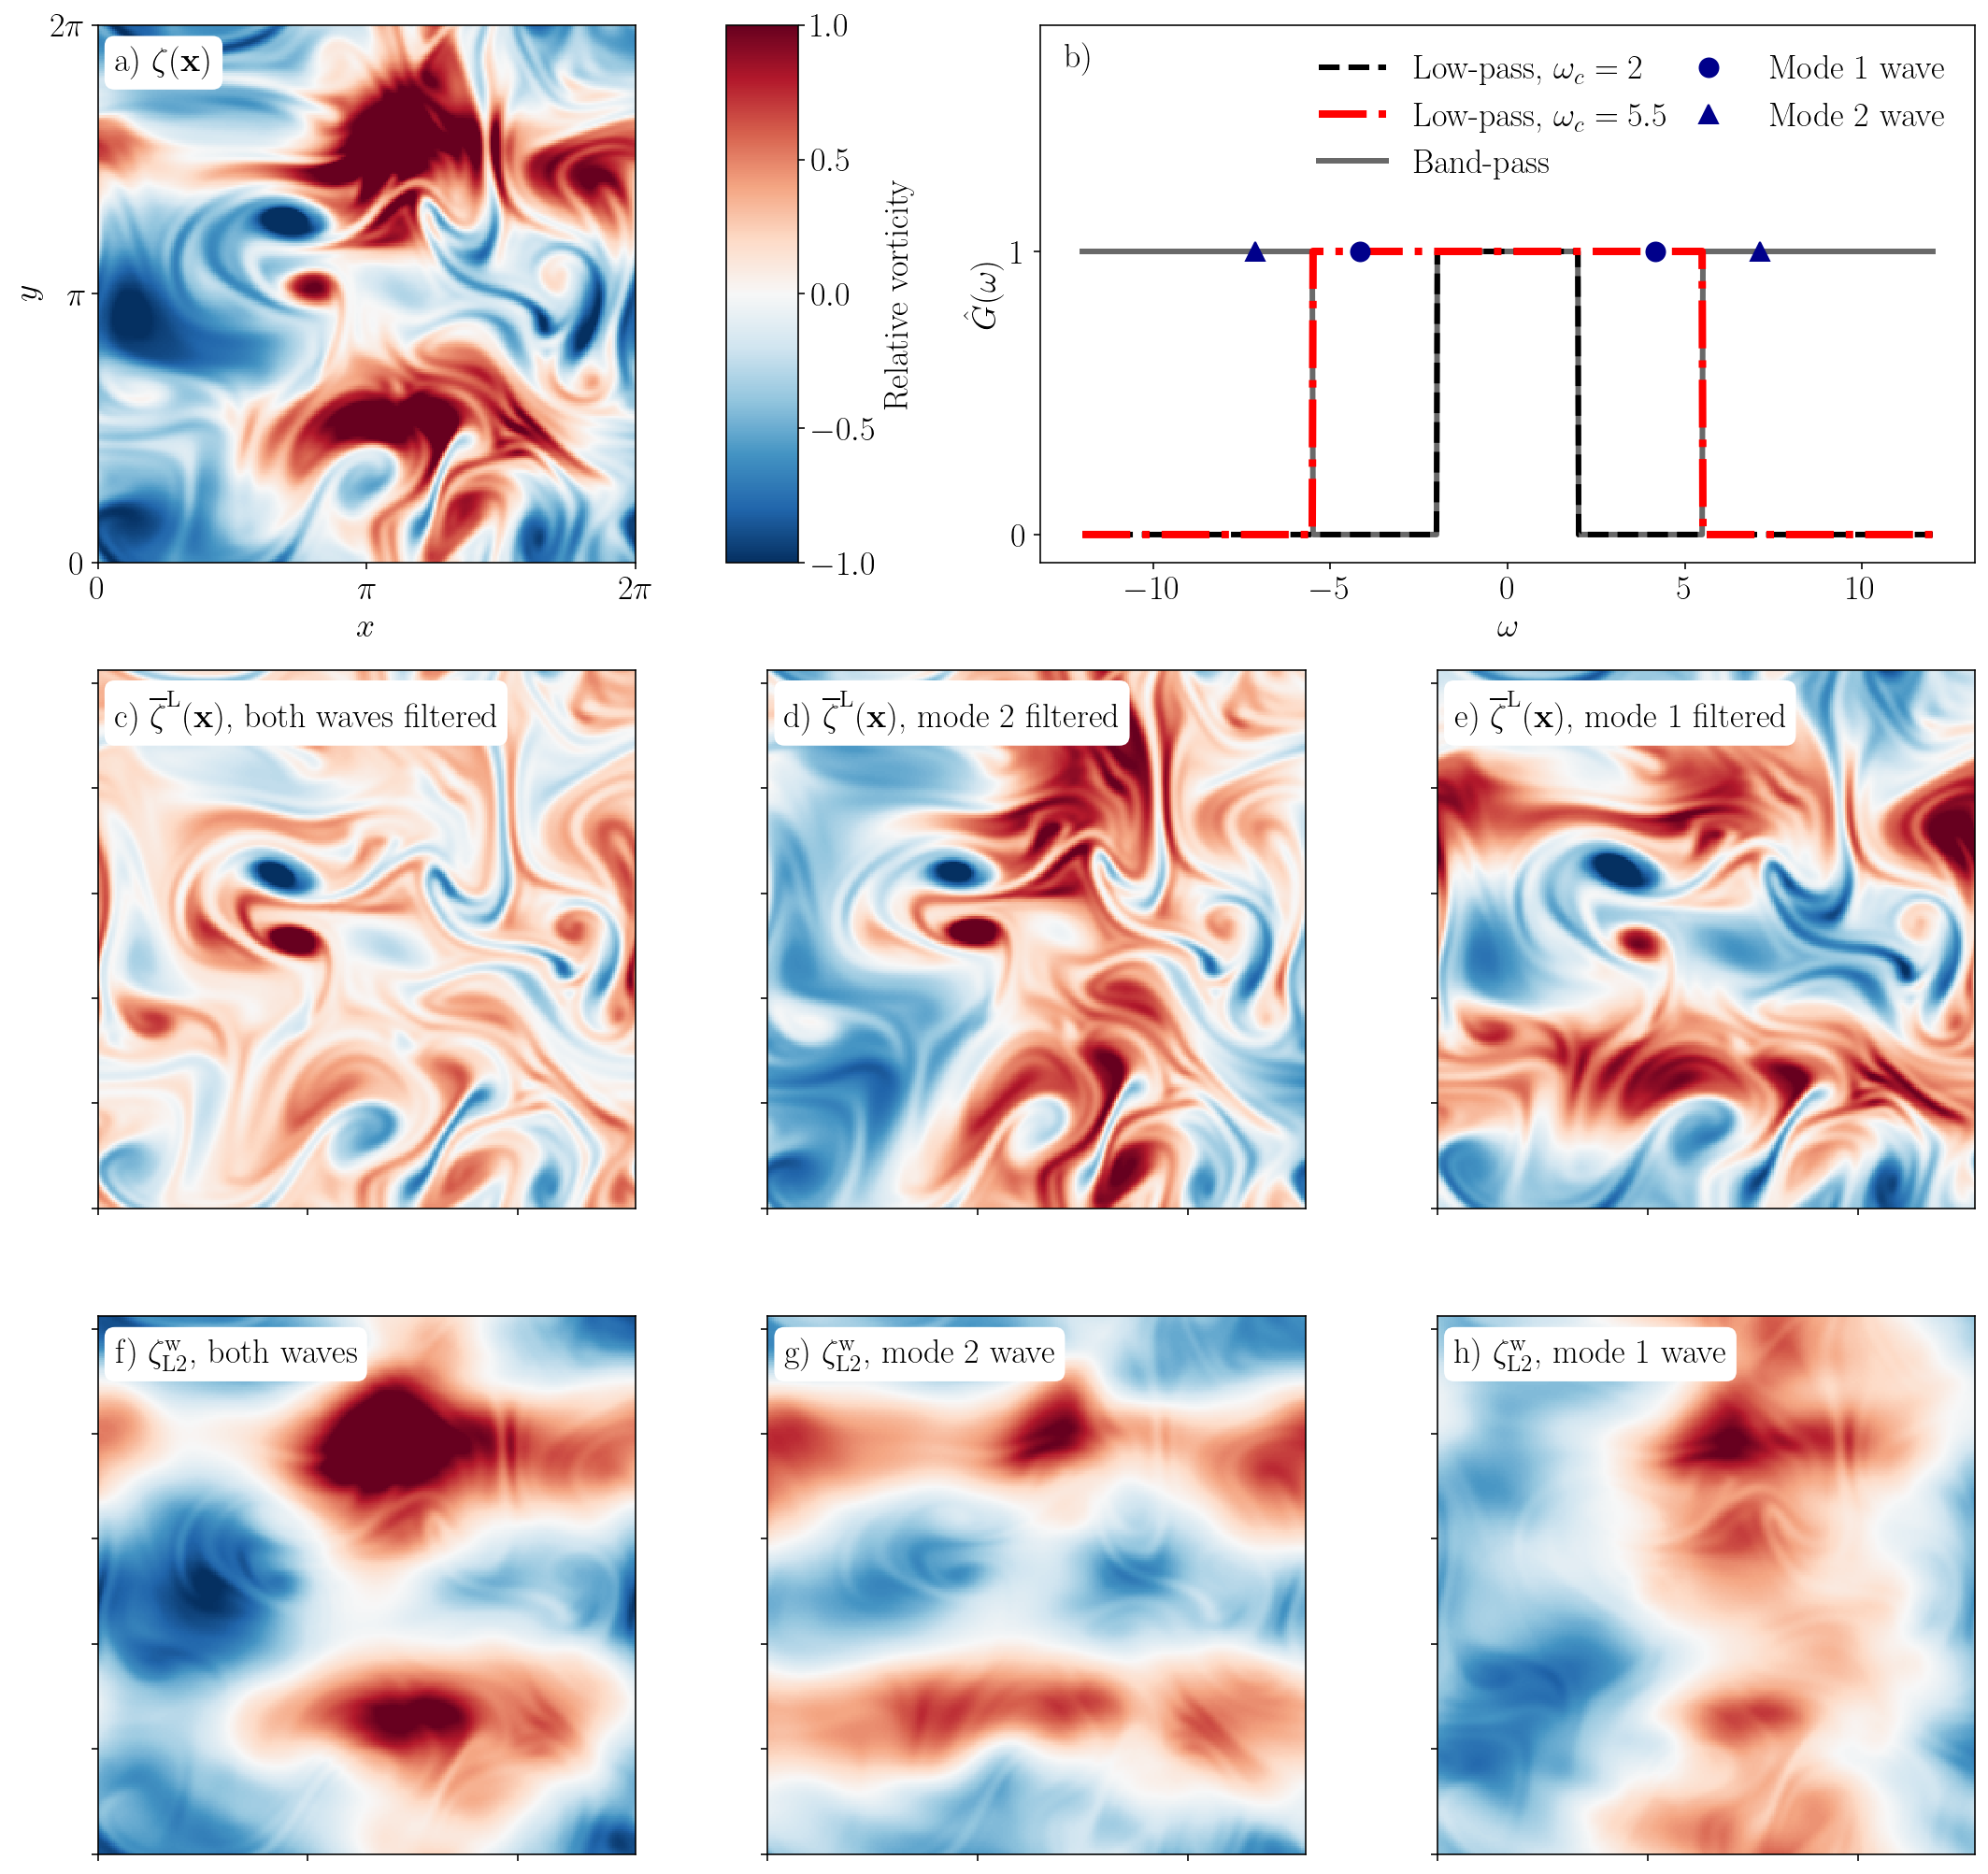

In [5]:
# Initialising figure
fig = plt.figure(figsize = (18,18))
ax0 = plt.subplot2grid((3, 48), (0, 0), colspan=16,rowspan=1)
axcb = plt.subplot2grid((3, 48), (0, 16), colspan=2,rowspan=1)
ax1 = plt.subplot2grid((3, 48), (0, 24), colspan=24,rowspan=1)
ax2 = plt.subplot2grid((3, 48), (1, 0), colspan=16,rowspan=1)
ax3 = plt.subplot2grid((3, 48), (1, 16), colspan=16,rowspan=1)
ax4 = plt.subplot2grid((3, 48), (1, 32), colspan=16,rowspan=1)
ax5 = plt.subplot2grid((3, 48), (2, 0), colspan=16,rowspan=1)
ax6 = plt.subplot2grid((3, 48), (2, 16), colspan=16,rowspan=1)
ax7 = plt.subplot2grid((3, 48), (2,32), colspan=16,rowspan=1)
axes = [ax2,ax3,ax4,ax4,ax5,ax6,ax7]

# Plotting
vmin = -1
vmax = 1
p0 = ax0.pcolormesh(ds_lp.z_inst,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
ax2.pcolormesh(ds_lp2.z_LM_at_mean,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
ax5.pcolormesh(ds_lp2.z_inst_at_mean - ds_lp2.z_LM_at_mean,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
ax3.pcolormesh(ds_lp.z_LM_at_mean,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
ax6.pcolormesh(ds_lp.z_inst_at_mean - ds_lp.z_LM_at_mean,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
ax4.pcolormesh(ds_lbp.z_LM_at_mean,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
ax7.pcolormesh(ds_lbp.z_inst_at_mean - ds_lbp.z_LM_at_mean,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')

fig.colorbar(p0,cax=axcb,orientation='vertical',label='Relative vorticity',pad=-1, aspect=30)
textposx = 8
textposy = 234
bbox=dict(facecolor='white', edgecolor='none', boxstyle='round')
ax0.text(textposx,textposy,r'a) $\zeta(\mathbf{x})$',bbox=bbox)
ax2.text(textposx,textposy-5,r'c) $\overline{\zeta}^\mathrm{L}(\mathbf{x})$, both waves filtered',bbox=bbox)
ax3.text(textposx,textposy-5,r'd) $\overline{\zeta}^\mathrm{L}(\mathbf{x})$, mode 2 filtered',bbox=bbox)
ax4.text(textposx,textposy-5,r'e) $\overline{\zeta}^\mathrm{L}(\mathbf{x})$, mode 1 filtered',bbox=bbox)
ax5.text(textposx,textposy,r'f) $\zeta_{\mathrm{L2}}^\mathrm{w}$, both waves',bbox=bbox)
ax6.text(textposx,textposy,r'g) $\zeta_{\mathrm{L2}}^\mathrm{w}$, mode 2 wave',bbox=bbox)
ax7.text(textposx,textposy,r'h) $\zeta_{\mathrm{L2}}^\mathrm{w}$, mode 1 wave',bbox=bbox)

# Plot frequency response panel
omega = np.linspace(-12,12,1000)
ghat_lp1 = np.zeros_like(omega)
ghat_lp1[np.abs(omega)< 2] = 1
ghat_lp2 = np.zeros_like(omega)
ghat_lp2[np.abs(omega)< 5.5] = 1
ghat_bp = np.zeros_like(omega)
ghat_bp[(np.abs(omega) < 2) | (np.abs(omega) > 5.5)] = 1
l1, = ax1.plot(omega,ghat_bp,'dimgrey',linewidth=3,label='Band-pass')
l2, = ax1.plot(omega,ghat_lp1,'--',color='k',linewidth=3,label='Low-pass, $\omega_c = 2$')
l3, = ax1.plot(omega,ghat_lp2,'r-.',linewidth=4,label='Low-pass, $\omega_c = 5.5$')
l4, = ax1.plot(4.17,1,marker='o', color='darkblue',linestyle='None',markersize=10,label='Mode 1 wave')
ax1.plot(-4.17,1,marker='o', color='darkblue',linestyle='None',markersize=10)
l5, = ax1.plot(7.12,1,marker='^', color='darkblue',linestyle='None',markersize=10,label='Mode 2 wave')
ax1.plot(-7.12,1,marker='^', color='darkblue',linestyle='None',markersize=10)
ax1.legend(handles=[l2,l3,l1,l4,l5],loc='upper right',frameon=False,ncol=2,columnspacing=0.2)
ax1.text(-12.5,1.65,'b)',bbox=bbox)

# Formatting
[ax.axes.set_xticklabels([]) for ax in axes];
[ax.axes.set_yticklabels([]) for ax in axes];
ax0.set_xticks([0,128,256])
ax0.set_yticks([0,128,256])
labels = ['0','$\pi$','$2\pi$']
ax0.set_xticklabels(labels)
ax0.set_yticklabels(labels)
ax0.set_xlabel('$x$')
ax0.set_ylabel('$y$')
ax0.set_aspect('equal',anchor='NW')
ax2.set_aspect('equal',anchor='NW')
ax3.set_aspect('equal',anchor='N')
ax4.set_aspect('equal',anchor='NE')
ax5.set_aspect('equal',anchor='SW')
ax6.set_aspect('equal',anchor='S')
ax7.set_aspect('equal',anchor='SE')
ax1.set_ylim([-0.1,1.8])
ax1.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$\hat{G}(\omega)$')
ax1.set_xticks([-10,-5,0,5,10])
ax1.set_yticks([0,1])

fig.savefig('Figure-7.png',dpi=200,bbox_inches='tight')


An example of different frequency filters with corresponding functions $\hat{G}(\omega)$ shown in panel b. a\) Instantaneous vorticity for a MSW simulation with a mode\-1 wave in $x$ and a mode\-2 wave in $y$ of the same vorticity amplitude \($A = 0.5$\), with respective frequencies 4.17 and 7.12. c\) Lagrangian low\-pass filter of the flow in panel a with a cut\-off frequency of 2, so that both waves are removed, d\) as in panel c with a cut\-off frequency of 5.5, so that only the mode\-2 wave is removed, and e\) as in panel c with the filter defined in equation \(2.12\) and labelled 'band\-pass' in panel b, with $\omega_1 = 2$ and $\omega_2 = 5.5$, so that the mode\-2 wave is retained and the mode\-1 removed. f, g, and h\) L2 wave perturbation corresponding to panels c, d, and e respectively.


More data variables are available in the xarray datasets:

In [8]:
ds_lp

<xarray.Dataset>
Dimensions:         (y: 256, x: 256)
Coordinates:
  * x               (x) float64 0.0 0.02454 0.04909 0.07363 ... 6.21 6.234 6.259
  * y               (y) float64 0.0 0.02454 0.04909 0.07363 ... 6.21 6.234 6.259
    t               float64 ...
Data variables:
    z_inst          (y, x) float64 -0.4512 -0.5073 -0.5988 ... -0.4841 -0.4567
    z_EM            (y, x) float64 ...
    z_inst_at_end   (y, x) float64 ...
    z_LM_at_mid     (y, x) float64 ...
    z_LM_at_end     (y, x) float64 ...
    Xi31_x          (y, x) float64 ...
    Xi31_y          (y, x) float64 ...
    z_inst_at_mean  (y, x) float64 ...
    z_LM_at_mean    (y, x) float64 -0.228 -0.3646 -0.4851 ... 0.09951 0.01481
    Xi32_x          (y, x) float64 ...
    Xi32_y          (y, x) float64 ...
    timestep        int32 ...
Attributes:
    description:  SW GLM solver outputs

In [0]:
s